<a href="https://colab.research.google.com/github/TaufiqueSekh/Naive-Bayes-Algorithm-with-Python/blob/main/Naive_Bayes_Algorithm_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Algorithm with Python
### By Taufique Sekh
### For code and data set ,Visit:

#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### Get the data set

In [ ]:
# The reason behind using encoding='latin1' is that we can handle any special character present in the data set.
df=pd.read_csv('/Users/taufique/spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### We can see that there are three unnamed column,which has no use. So we can delete these three unnamed columns.

In [ ]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### We can rename the columns for better understanding. Let's use v1 as Label and v2 as Text

In [ ]:
df.columns=['label','text']

In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Now convert label into numerical value like if spam =1 and ham=0

In [ ]:
df['label']=np.where(df['label']=='spam',1,0)

In [ ]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

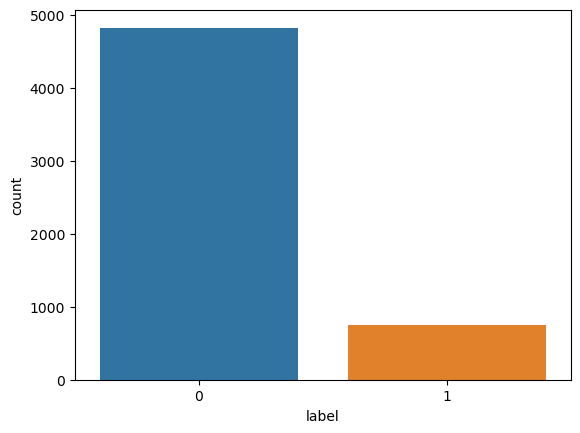

In [ ]:
sns.countplot(x=df["label"])

#### Let's Split the data into Train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df['text']
y=df['label']

### Machine learning does not understand the text data, so we need to transform the text into numerical value.
we can do this by using CountVectorizer

Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
'''When building the vocabulary ignore terms that have a document
    frequency strictly higher than the given threshold (corpus-specific
    stop words).
    If float, the parameter represents a proportion of documents, integer
    absolute counts.'''
    
vc=CountVectorizer()

In [ ]:
X=vc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("x_train - >  ",X_train.shape)
print("x_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (3900, 8672)
x_test - >   (1672, 8672)
y_train - >   (3900,)
y_test - >   (1672,)


##### Training and Evaluating model

#### Now apply Bernoulli Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb=BernoulliNB()

In [ ]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [ ]:
bnb_pred=bnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
print("accuracy score :- ",accuracy_score(y_test,bnb_pred))
print("precision score :- ",precision_score(y_test,bnb_pred))

accuracy score :-  0.9784688995215312
precision score :-  0.9893048128342246


#### Now apply Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
mnb_pred=mnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
print("accuracy score :- ",accuracy_score(y_test,mnb_pred))
print("precision score :- ",precision_score(y_test,mnb_pred))

accuracy score :-  0.9784688995215312
precision score :-  0.9178082191780822


#### Now apply  Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
gnb_pred=gnb.predict(X_test)

In [ ]:
print("accuracy score :- ",accuracy_score(y_test,gnb_pred))
print("precision score :- ",precision_score(y_test,gnb_pred))

accuracy score :-  0.9043062200956937
precision score :-  0.5860058309037901


## Preparing Model for deployment

In [ ]:
import pickle

In [ ]:
'''
dump() is use for save the model in the form of file in any format

'wb' means write binary
'rb' means read binary, use when loading the model


'.sav'  = The SAV file extension is more commonly known as a generic 
          extension that is used to save files and data, typically 
          for saving progress in video games.
'''
pickle.dump(mnb,open('model.sav','wb'))

## Checking whether our model working fine or not ??

In [ ]:
load_model_mnb=pickle.load(open('model.sav','rb'))

In [ ]:
input_sms=['Even my brother is not like to speak with me. They treat me like aids patent.']

In [ ]:
input_sms=vc.fit_transform(input_sms)

In [ ]:
input_sms

<1x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
load_model_mnb.predict(input_sms)

'Even my brother is not like to speak with me. They treat me like aids patent.'